<a href="https://colab.research.google.com/github/dtabuena/CrispyMice/blob/main/New_pipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib

to_import = [
          'ABF_Quality_Control.ipynb',
          'Basic_Ephys.ipynb',
          'Firing_Rate_Gain.ipynb',
          'Simple_ABF_tools.ipynb',
          'IV_analyzer.ipynb',
          'Vm_analyzer.ipynb',
          'membrane_analyzer.ipynb',
          'rheobase_analyzer.ipynb',
          'fun_math.ipynb',
          'importing_abfs_from_dropbox.ipynb',
          'input_resistance_analyzer.ipynb',
          'latencey_analyzer.ipynb',
          'QC_recoding_dataframe.ipynb'
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f


try: shutil.rmtree('/content/CrispyMice')
except: None
!git clone https://github.com/dtabuena/CrispyMice
to_import = ['CrispyPipelineFuncs.ipynb']
for i in to_import:
    f = '/content/CrispyMice/' + i
    %run $f

Cloning into 'EphysLib'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 295 (delta 134), reused 150 (delta 104), pack-reused 94
Receiving objects: 100% (295/295), 215.03 KiB | 1.58 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'CrispyMice'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 159 (delta 42), reused 25 (delta 25), pack-reused 107
Receiving objects: 100% (159/159), 3.49 MiB | 9.15 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [3]:
dataset = {'data_name': 'RNF182',
           'data_source': "https://www.dropbox.com/sh/n9t8p257wnzlijk/AAC9Z36JodisyZjnM3mkJC3Xa?dl=0",
           'file_naming_scheme': ['Rec_date','Virus','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s'
           'VC - 3min GapFree']

In [6]:

'''Unpack'''
data_name = dataset['data_name']
data_source = dataset['data_source']
file_naming_scheme = dataset['file_naming_scheme']



''' Gather and Catalog Source Data'''
file_loc = get_drobox_folder(data_source, 'my_ephys_data')
clear_output(wait=False)   
abf_recordings_df, protocol_set = catalogue_recs(file_loc,file_naming_scheme)
# abf_recordings_df, _ = purge_wrong_clamp(abf_recordings_df,VC_prot,IC_prot)
# cell_prot_lut(abf_recordings_df,protocol_set,csv_name=data_name+'_LUT')

  0%|          | 0/256 [00:00<?, ?it/s]

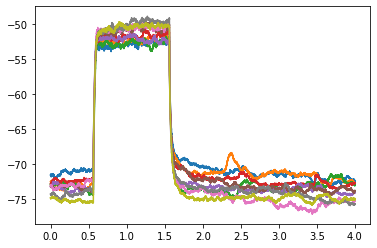

  2%|▏         | 6/256 [00:03<02:37,  1.59it/s]

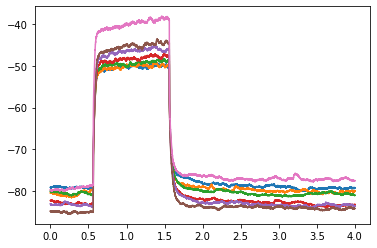

  3%|▎         | 7/256 [00:06<04:38,  1.12s/it]

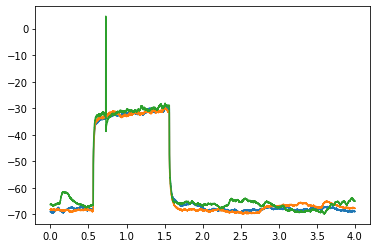

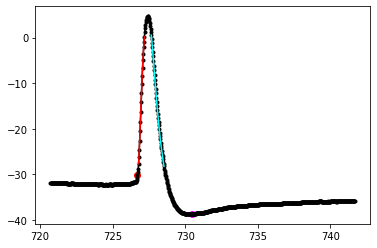

  4%|▎         | 9/256 [00:11<06:13,  1.51s/it]

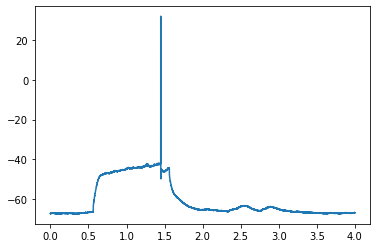

  8%|▊         | 21/256 [00:13<01:57,  2.00it/s]

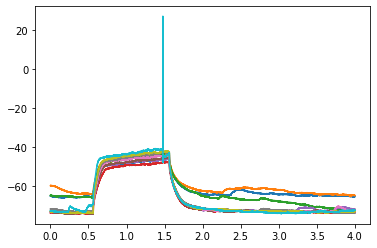

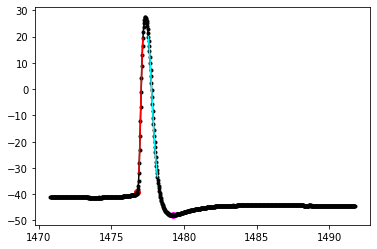

  9%|▉         | 24/256 [00:19<03:19,  1.16it/s]

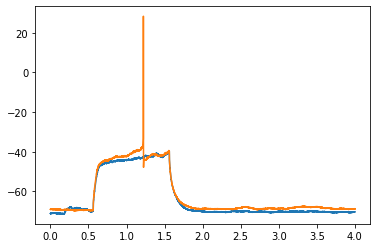

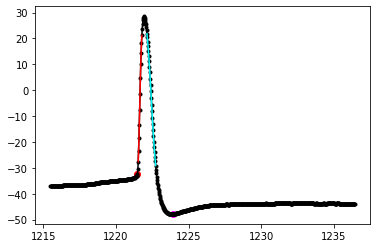

 11%|█▏        | 29/256 [00:24<03:15,  1.16it/s]

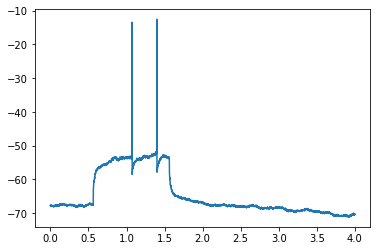

 15%|█▍        | 38/256 [00:25<01:58,  1.84it/s]

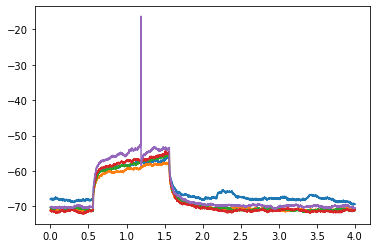

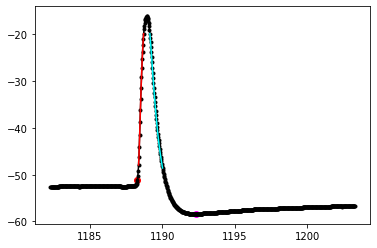

 15%|█▌        | 39/256 [00:30<03:04,  1.17it/s]

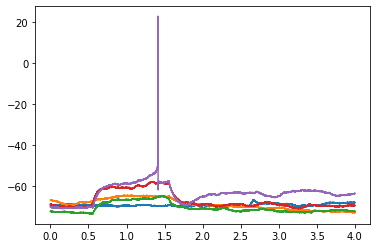

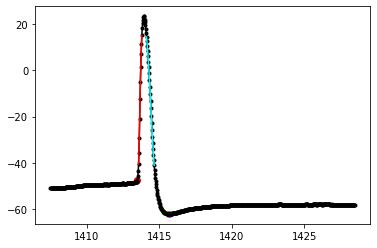

 18%|█▊        | 46/256 [00:35<02:47,  1.25it/s]

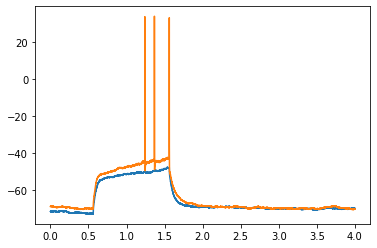

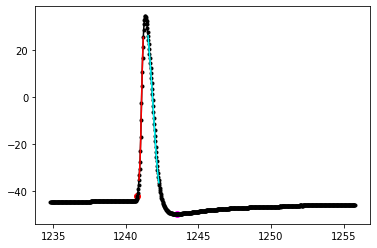

 22%|██▏       | 57/256 [00:40<01:59,  1.66it/s]

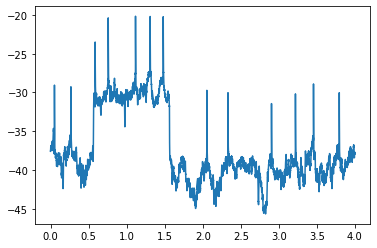

 27%|██▋       | 70/256 [00:41<01:11,  2.59it/s]

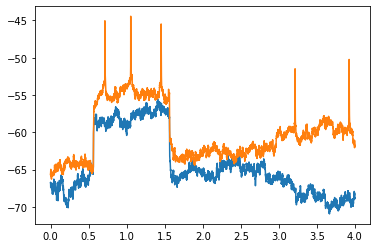

 28%|██▊       | 71/256 [00:43<01:24,  2.18it/s]

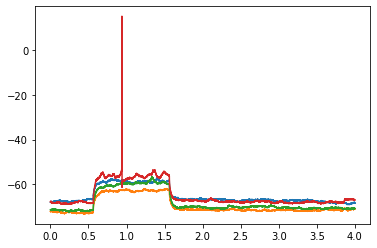

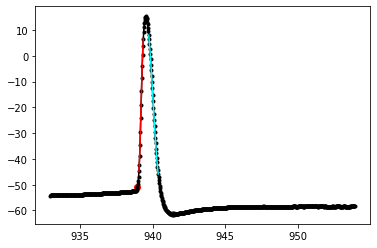

 30%|███       | 77/256 [00:48<01:39,  1.80it/s]

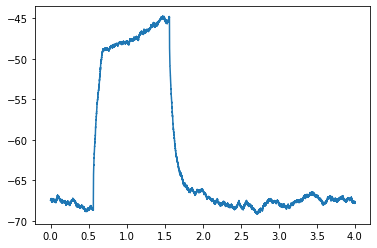

 35%|███▍      | 89/256 [00:49<01:00,  2.77it/s]

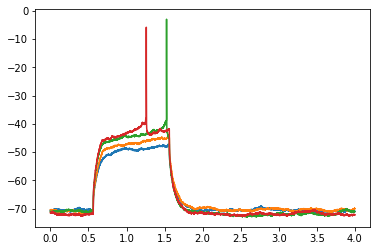

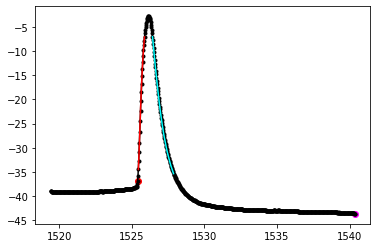

 35%|███▌      | 90/256 [00:54<01:36,  1.71it/s]

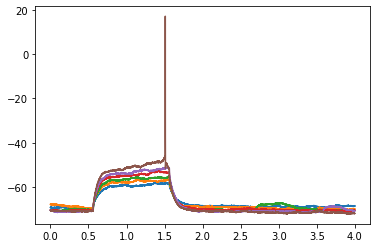

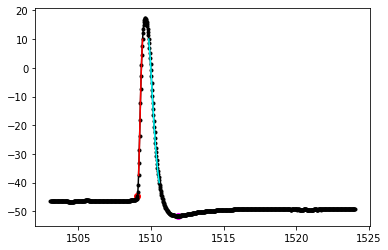

 39%|███▊      | 99/256 [01:00<01:32,  1.70it/s]

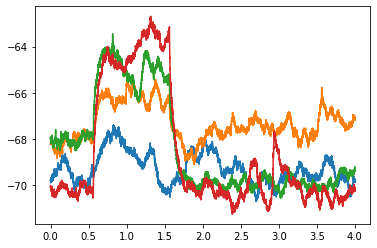

 41%|████      | 105/256 [01:02<01:22,  1.83it/s]

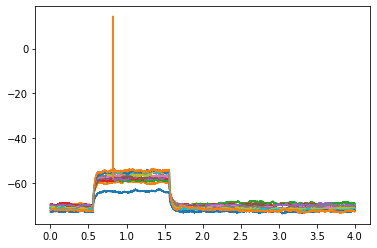

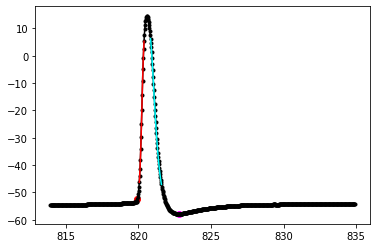

 42%|████▏     | 107/256 [01:09<02:10,  1.14it/s]

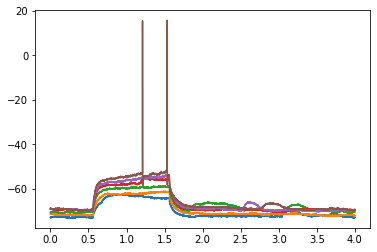

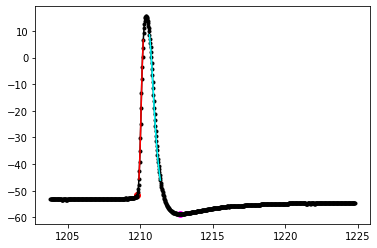

 46%|████▌     | 117/256 [01:14<01:39,  1.39it/s]

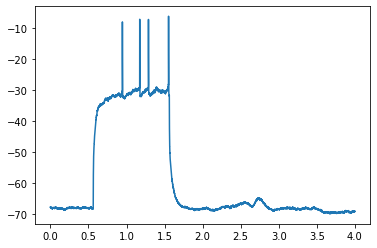

 48%|████▊     | 124/256 [01:16<01:14,  1.78it/s]

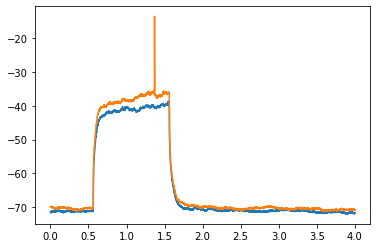

 49%|████▉     | 125/256 [01:18<01:23,  1.56it/s]

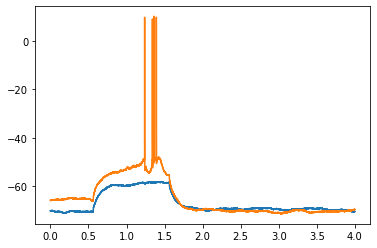

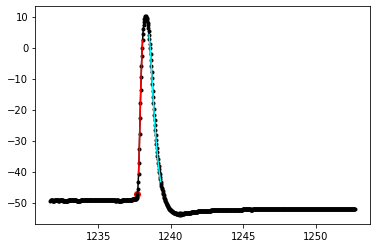

 53%|█████▎    | 136/256 [01:22<01:02,  1.93it/s]

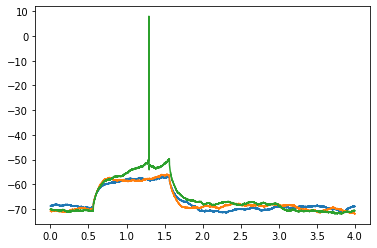

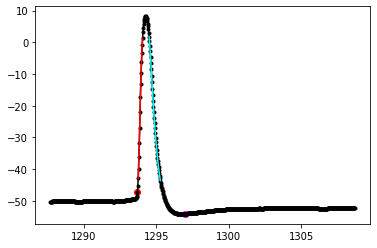

 54%|█████▎    | 137/256 [01:26<01:29,  1.33it/s]

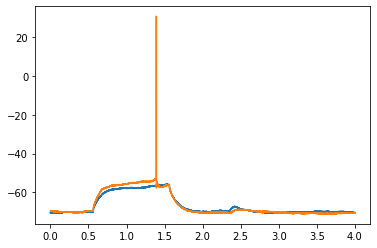

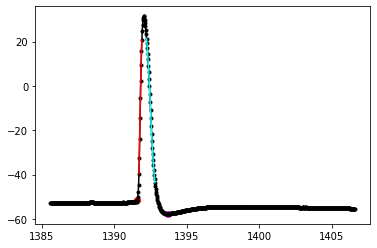

 59%|█████▊    | 150/256 [01:31<00:51,  2.05it/s]

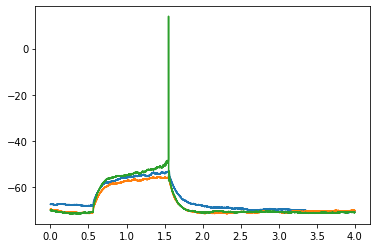

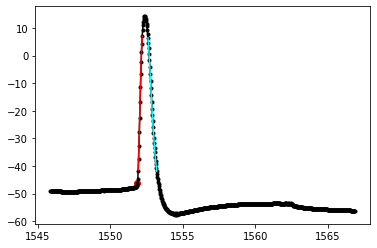

 59%|█████▉    | 152/256 [01:35<01:14,  1.40it/s]

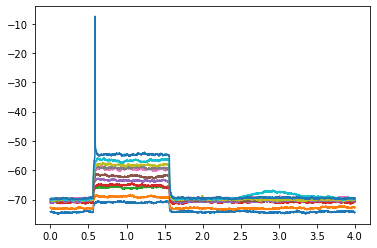

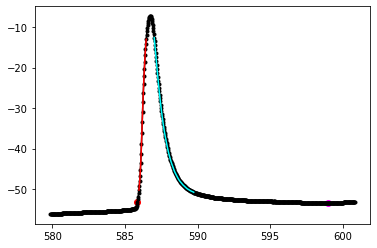

 63%|██████▎   | 161/256 [01:42<01:08,  1.39it/s]

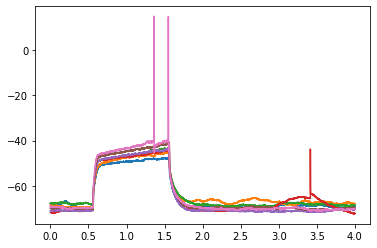

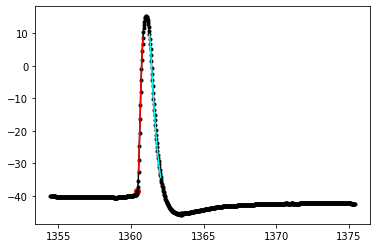

 66%|██████▌   | 168/256 [01:48<01:07,  1.31it/s]

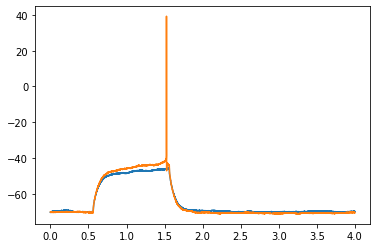

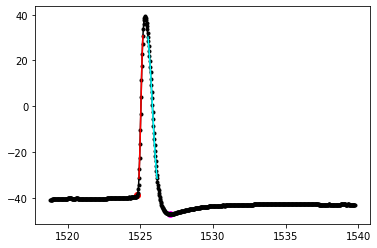

 68%|██████▊   | 175/256 [01:52<00:58,  1.38it/s]

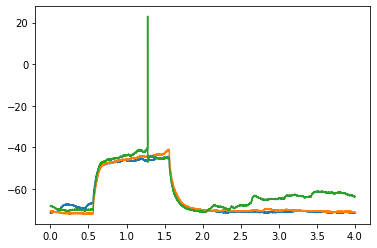

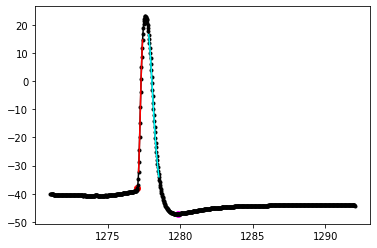

 71%|███████▏  | 183/256 [01:57<00:48,  1.50it/s]

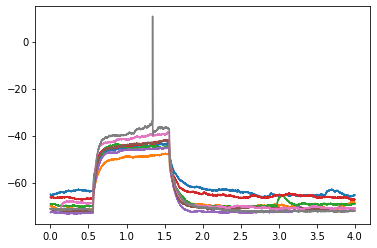

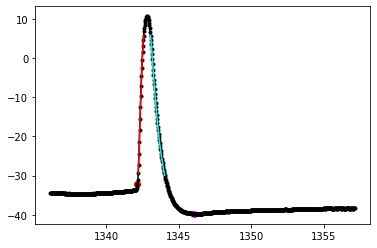

 75%|███████▍  | 191/256 [02:02<00:44,  1.46it/s]

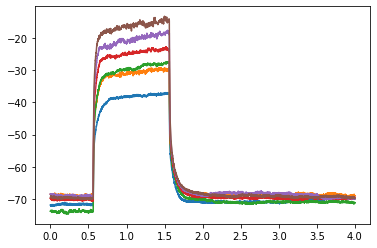

 78%|███████▊  | 200/256 [02:05<00:31,  1.78it/s]

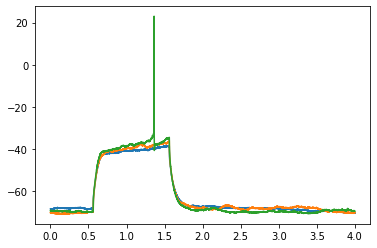

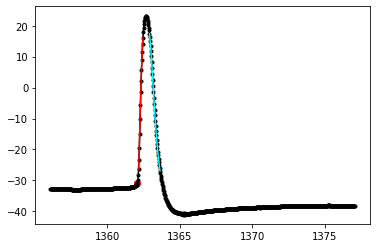

 80%|███████▉  | 204/256 [02:10<00:34,  1.50it/s]

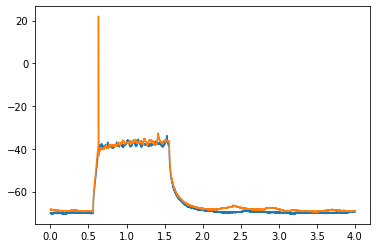

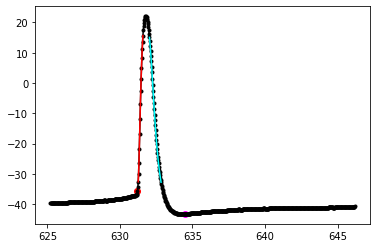

 83%|████████▎ | 213/256 [02:14<00:25,  1.68it/s]

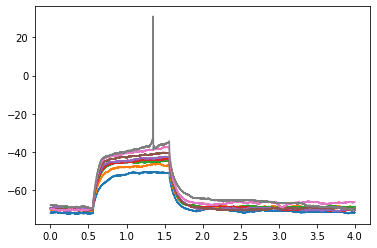

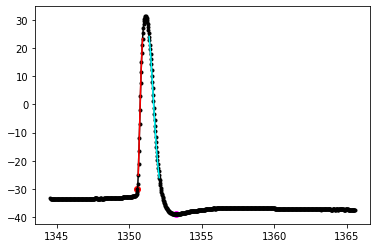

 87%|████████▋ | 223/256 [02:20<00:19,  1.69it/s]

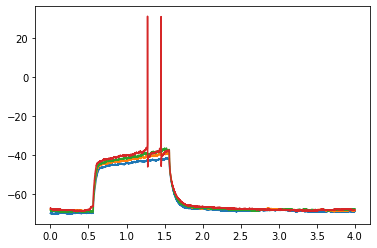

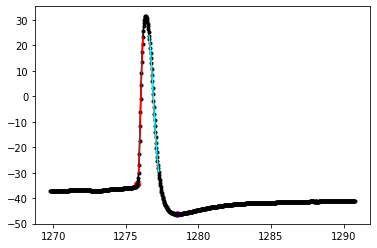

 91%|█████████ | 232/256 [02:25<00:13,  1.75it/s]

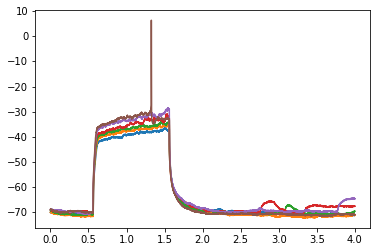

 94%|█████████▍| 241/256 [02:28<00:07,  2.03it/s]

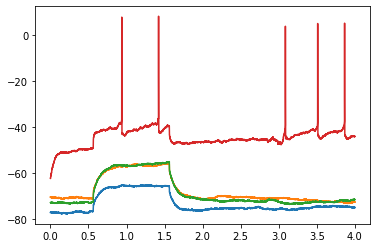

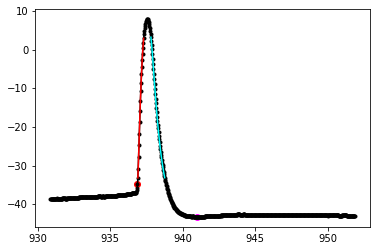

 98%|█████████▊| 250/256 [02:33<00:03,  1.98it/s]

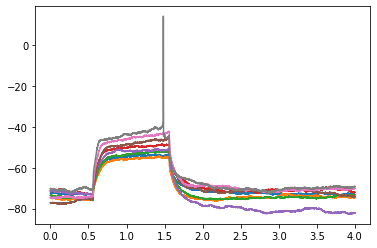

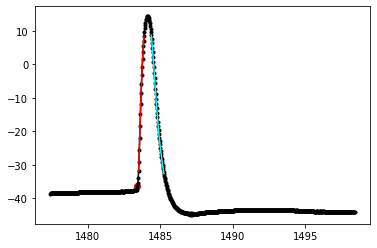

100%|██████████| 256/256 [02:38<00:00,  1.61it/s]

[]


In [48]:


'''Set Internal Analysis Params'''
spike_args =  {'spike_thresh':20, 'high_dv_thresh': 50,'low_dv_thresh': -30,'window_ms': 2}

func_dict = {}
arg_dict = {}

# func_dict['VC - 3min GapFree']= rmp_analyzer
# arg_dict['VC - 3min GapFree'] = [False]

func_dict['IC - Rheobase']= rheobase_analyzer
arg_dict['IC - Rheobase'] = [spike_args, True, False, False]  # [spike_args, to_plot, verbose, force_singlespike]

# func_dict['IC - Gain - D20pA']= gain_analyzer
# arg_dict['IC - Gain - D20pA']= [spike_args, 0.8, 0]  # [spike_args, to_plot, verbose, force_singlespike]
# func_dict['IC - Gain - D50pA']= func_dict['IC - Gain - D20pA'] 
# arg_dict['IC - Gain - D50pA']= arg_dict['IC - Gain - D20pA']

# func_dict['VC - MemTest-10ms-160ms']= membrane_analyzer
# arg_dict['VC - MemTest-10ms-160ms']= [True, False, ['Ra', 'Rm', 'Cm', 'tau',	'Cmq',	'Cmf',	'Cmqf', 'Cm_pc']]  # [to_plot, verbose]

# func_dict['IC - Latentcy 800pA-1s']= latencey_analyzer 
# arg_dict['IC - Latentcy 800pA-1s']= [spike_args, True]  # [spike_args, to_plot]


# func_dict['IC - R input']= input_resistance_analyzer 
# arg_dict['IC - R input']= [[-30, 10] ,True]  # [dVm_limits, to_plot]

# func_dict['VC - Multi IV - 150ms'] = IV_analyzer
# arg_dict['VC - Multi IV - 150ms']= [{'IV_Early':(16.5, 30),'IV_Steady_State':(100,120)} ,False]  # [measure_windows, to_plot]


'''Analyze Dataset'''
abf_recordings_df, problem_recs = analysis_iterator(abf_recordings_df,func_dict,arg_dict)
print(problem_recs) 

# cell_df = cell_sorting(abf_recordings_df)

# '''Consolidate to Cells'''
# list_types = ['Recording_name','protocol','abf_timestamp', 'channelList']
# any_types = ['Rec_date',	'Virus',	'GenoType',	'Sex',	'Age',	'Slice_Num',  'Cell_num', 'Cell_Type']
# cell_df_con = cell_consolidation(cell_df,list_types,any_types)
# cols_to_simplify = ['IV_Early', 'IV_Steady_State']
# cell_df_nd = simplify_dicts(cell_df_con,cols_to_simplify)     

# '''Make Excell Friendly'''
# keys_and_data_cols={'Stim_Levels_(pA)': ['Stim_Levels_(pA)', 'Spike_Counts' ],
#                 'IV_Early_(V_stim)': ['IV_Early_(V_stim)', 'IV_Early_(I_peak)', 'IV_Steady_State_(I_mean)']}
# cell_df_csv = csv_frinedly(cell_df_nd,keys_and_data_cols)

# ''' Convert to Current Density'''
# size_col = 'Cmq_160.0'
# current_col_list = ['IV_Early_(I_peak)_', 'IV_Steady_State_(I_mean)_']
# cell_df_csv = current_density_correction(cell_df_csv, size_col, current_col_list)


# '''Abridge DataFrame'''
# abrg_exclusions = ['Recording_name', 
#                 'protocol', 'abf_timestamp', 'channelList',  'Ra_10.0', 'Rm_10.0', 'tau_10.0', 'Cmq_10.0', 'Cmf_10.0',
#                 'Cmqf_10.0',  'Cmf_160.0', 'Cmqf_160.0', 'Cm_pc_160.0',
#                 'Gain_R2', 'Stim_Levels_(pA)', 'Spike_Counts', 'Firing_Duration_%', 'Gain_Vh',  'Vhold_spike',
#                     'Rin_Rsqr',  'Ramp_AP_thresh', 'Ramp_Vh', 'Ramp_Rheobase', 
#                 'ap_thresh_us', 'v_half',
#                 'IV_Early_(range)', 'IV_Early_(I_peak)', 'IV_Early_(I_mean)', 'IV_Early_(V_stim)', 'IV_Steady_State_(range)',
#                 'IV_Steady_State_(I_peak)', 'IV_Steady_State_(I_mean)', 'IV_Steady_State_(V_stim)', ]

# abrg_keep = [c for c in cell_df_csv.columns if c not in abrg_exclusions]
# cell_df_csv_abrg = cell_df_csv[abrg_keep]

# '''Stratify Cells By Type'''
# strat_col = 'Cell_Type'
# xl_file_name= data_name+'.xlsx'
# new_dfs = stratify_cells(cell_df_csv_abrg,strat_col,xl_file_name)

In [ ]:
fn = 'my_ephys_data/2022_08_16/2022x08x16_RNF182_E4KI_F_P255_s003_c004_CA3xNEG_0004.abf'
abf = abf_or_name(fn)
rheobase_analyzer(fn,spike_args =  {'spike_thresh':20, 'high_dv_thresh': 25,'low_dv_thresh': -5,'window_ms': 2},to_plot=True)

In [ ]:
def write_strat_dfs(strat_dfs, xl_file_name='stratified_data.xlsx'):
    if '.xlsx' not in xl_file_name: xl_file_name = xl_file_name+'.xlsx'
    options = {}
    options['strings_to_formulas'] = False
    options['strings_to_urls'] = False
    writer = pd.ExcelWriter(xl_file_name, options=options)
    for k in strat_dfs.keys():
        cur_df = strat_dfs[k]
        strat_dfs[k].to_excel(writer, sheet_name=str(k))
    writer.save()
    writer.close()
    files.download(xl_file_name)
    return None

def flatten_dict(my_dict,flat_dict = {} ):
    for k in my_dict.keys():
        if isinstance(my_dict[k], dict):
            sub_dict, sub_keys = flatten_dict(my_dict[k],flat_dict)
            for sk in sub_keys:
                flat_dict[k+'_'+sk] = sub_dict[sk]
        else:
            flat_dict = my_dict
    return flat_dict, list(flat_dict.keys()) 

In [ ]:
strat_col = ['Rec_date','Cell_Type']

strat_df_dict = stratify_rec(cell_df_csv_abrg,strat_col)
strat_df_dict,_ = flatten_dict(strat_df_dict,{})
write_strat_dfs(strat_df_dict, dataset['data_name'])


In [ ]:


# ad = {'a1': 1, 'a2': 2}
# bd = {'b1': 3, 'b2': 4}
# a ={ 'a': ad, 'b': bd }

# print(a)
# fd, fdk = flatten_dict(a)
# print(fd)